In [1]:
import os
import pathlib
import tensorflow as tf

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


2022-04-12 16:46:48.686250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 16:46:48.691772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 16:46:48.692113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
IMAGE_PATHS = [ "images/test/0101_light_clear_smooth_01000126.png",
                "images/test/0401_light_clear_smooth_01000124.png",
                "images/test/0102_light_clear_smooth_01000090.png",
                "images/test/0102_light_clear_smooth_01000089.png",
                "images/test/0102_light_clear_smooth_01000084.png"]


In [3]:
PATH_TO_LABELS = "annotations/label_maps.pbtxt"
!head {PATH_TO_LABELS}

item {
    id: 1
    name: 'car'
}

item {
    id: 2
    name: 'bus'
}



In [4]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import tensorflow as tf
PATH_TO_SAVED_MODEL = "exported-models/my_model"+ "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...

2022-04-12 16:46:53.119122: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-12 16:46:53.120530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 16:46:53.120993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-12 16:46:53.121367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Done! Took 8.555795907974243 seconds


In [5]:
category_index = label_map_util.create_category_index_from_labelmap(
    PATH_TO_LABELS,
    use_display_name=True)
category_index

{1: {'id': 1, 'name': 'car'},
 2: {'id': 2, 'name': 'bus'},
 3: {'id': 3, 'name': 'truck'},
 4: {'id': 4, 'name': '2wheels'},
 5: {'id': 5, 'name': 'person'},
 6: {'id': 6, 'name': 'traffic_light'}}

In [6]:
## Helper function

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


In [39]:
def detect_objects(image_path):
    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)

    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # Do the detection
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    # show classes
    #unique_classes = set(detections['detection_classes'])
    #print("Classes found:")
    #for c in unique_classes:
    #    print(category_index[c]['name'])

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure(figsize=(15, 10))
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()

Running inference for images/test/0101_light_clear_smooth_01000126.png... Done


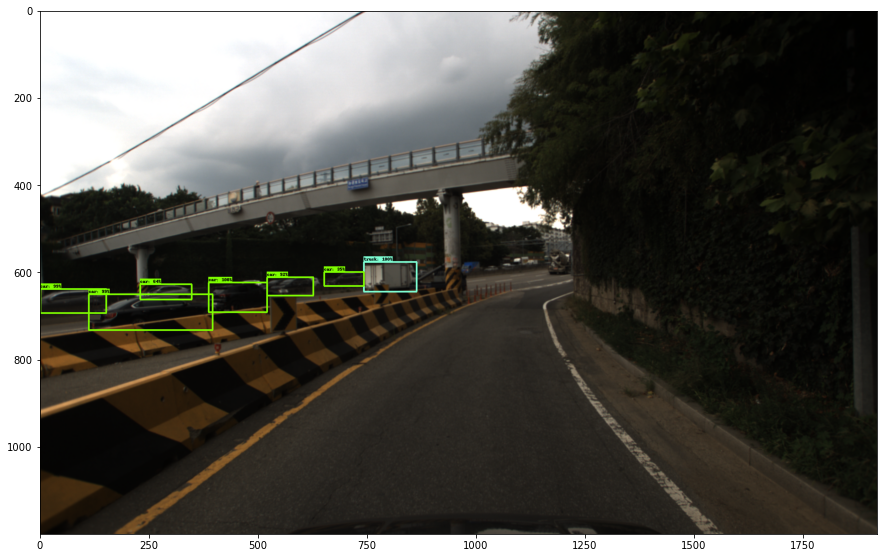

In [40]:
detect_objects(IMAGE_PATHS[0])

Running inference for images/test/0401_light_clear_smooth_01000124.png... Done


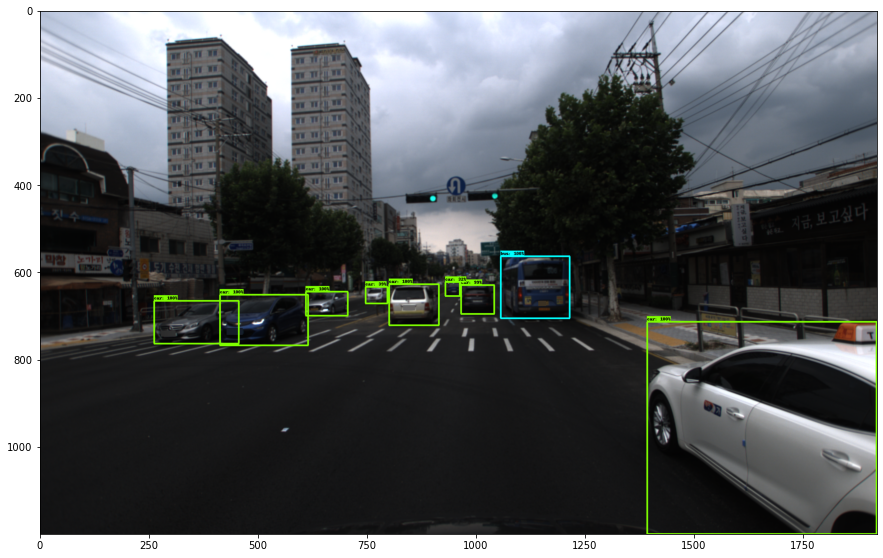

In [41]:
detect_objects(IMAGE_PATHS[1])

Running inference for images/test/0102_light_clear_smooth_01000090.png... Done


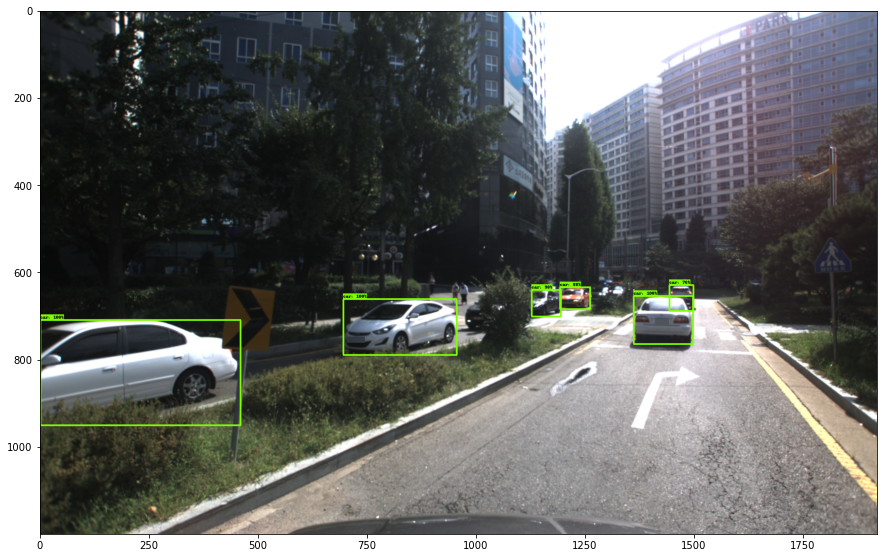

In [42]:
detect_objects(IMAGE_PATHS[2])

Running inference for images/test/0102_light_clear_smooth_01000089.png... Done


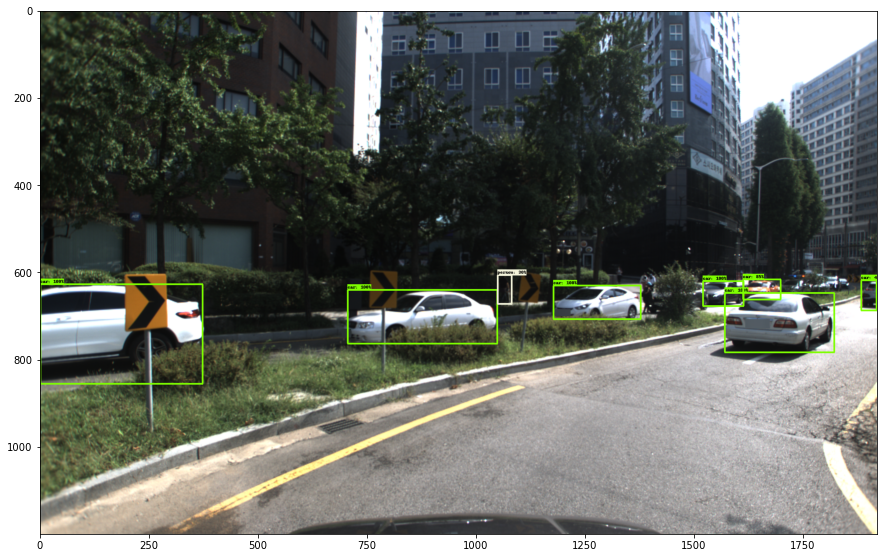

In [43]:
detect_objects(IMAGE_PATHS[3])

Running inference for images/test/0102_light_clear_smooth_01000084.png... Done


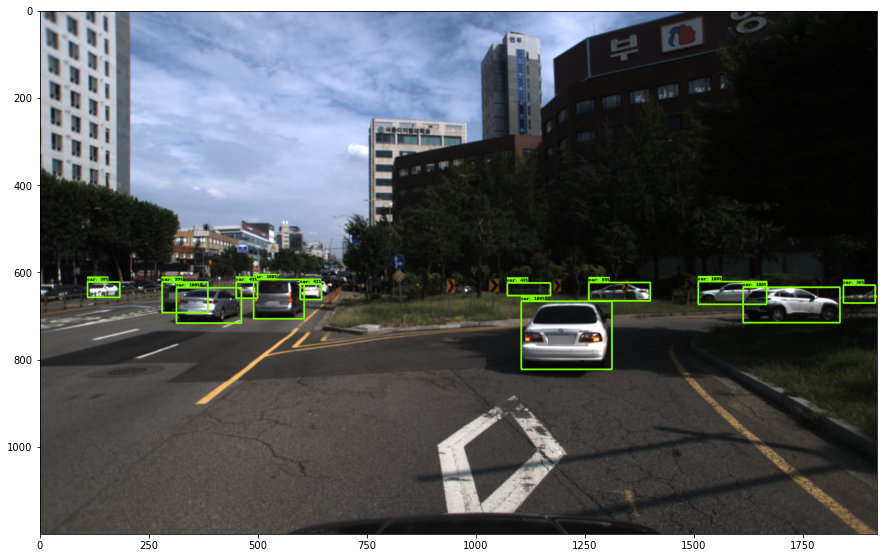

In [44]:
detect_objects(IMAGE_PATHS[4])